# TP8 No arbitrage conditions on the implied volatility surface 

## Numerical processing of financial data MAP542

Stefano De Marco

#### Objective
The goal of this notebook is to analyse (numerically) the no arbitrage conditions for the SVI parameterisation of the implied volatility.

## The SVI parameterisation (again)


Recall that the implied total variance $w(T,k)$ for maturity $T$ and log-forward moneyness $k$ is defined by

$$
w(T,k) = T \, \hat \sigma^2(T, k)
$$

where $\hat \sigma(T, k)$ denotes the implied volatility for the same maturity and log-forward moneyness.

__Recall the SVI parameterisation__ proposed by [Gatheral 2004](http://faculty.baruch.cuny.edu/jgatheral/madrid2004.pdf) to model the total implied variance smile for a fixed maturity $T$ :

\begin{equation}
w_\mathrm{SVI}(k) = a + b \left(\rho (k - \bar k) + \sqrt{(k - \bar k)^2 + \sigma^2} \right),
\qquad k \in \mathbb R,
\end{equation}

where the parameters $(a, b, \rho, \bar k, \sigma)$ satisfy

$$
b > 0 \qquad \quad \rho \in (-1,1) \qquad \quad \sigma > 0, \qquad \quad a, \bar k \in \mathbb R.
$$

Since $\min_{k \in \mathbb R} w_\mathrm{SVI}(k) = a + b \, \sigma \, \sqrt{1 - \rho^2}$, in general we also have to impose the condition $a + b \, \sigma \, \sqrt{1 - \rho^2} > 0$ in order to grant positivity of the function $w_\mathrm{SVI}$.

### $\blacktriangleright$ The goal of this notebook is to discuss and analyse numerically the no-arbitrage conditions on the SVI parameterization.

First of all, let us define the SVI function (..which we could also import from Notebook 8)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def SVI(k, a, b , rho, k_bar, sig):
    total_variance = a + b*( rho*(k - k_bar) + np.sqrt( (k - k_bar)*(k - k_bar) + sig*sig) )
    
    return total_variance

Let us have a look at a few examples of SVI functions

In [2]:
########################
# A parameter set
########################
a = 0.04
b = 0.4
rho = -0.7
k_bar = 0.1
sig = 0.2

In [4]:
def test_positivity(a, b, rho, sig):
    assert(rho <= 1); assert(-1 <= rho)
    assert(b > 0)
    
    ## We check the positivity of the minimum 
    minimum = a + b * sig * np.sqrt(1 - rho ** 2)
    assert(minimum > 0)
    
    print("\n Positivity test: OK \n")
    
    return 0

test_positivity(a, b, rho, sig)


 Positivity test: OK 



0

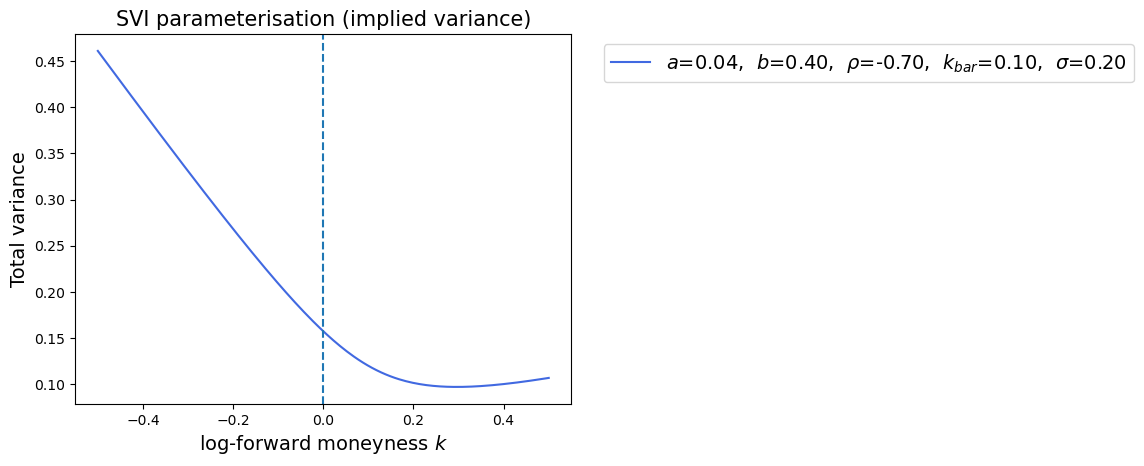

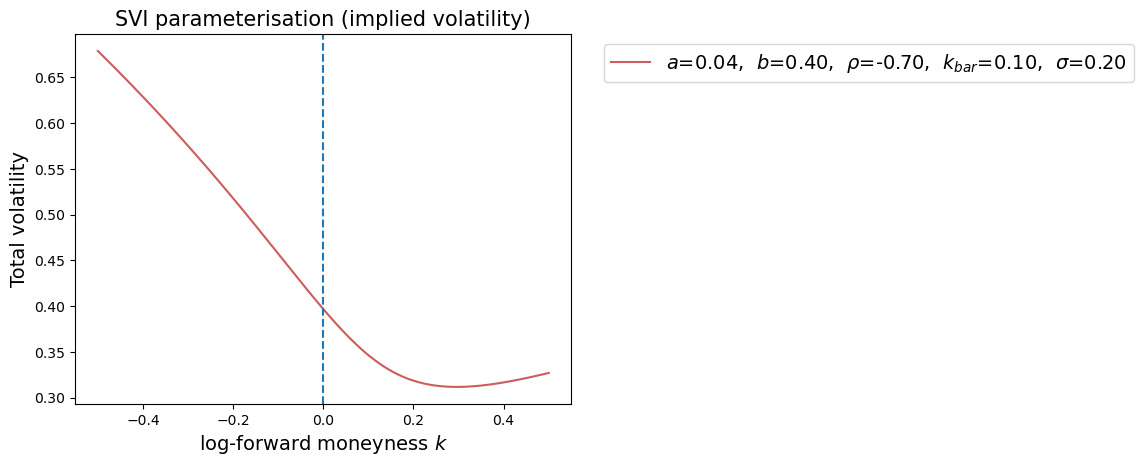

In [5]:
log_moneyness = np.linspace(-0.5, 0.5, 200)

total_variances = SVI(log_moneyness, a, b, rho, k_bar, sig)

plt.plot(log_moneyness , total_variances , color='royalblue', linewidth=1.5, \
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a,b,rho,k_bar,sig))

plt.axvline(0., linestyle="--")

plt.xlabel("log-forward moneyness $k$", fontsize=14)
plt.ylabel("Total variance", fontsize=14)
plt.title(r"SVI parameterisation (implied variance)", fontsize=15)

plt.legend(loc=9, fontsize=14, bbox_to_anchor=(1.6, 1.0), ncol=1)

#######################################################
## Corresponding SVI total implied vol
#######################################################
total_vols = np.sqrt(total_variances)

plt.figure()

plt.plot(log_moneyness, total_vols, color="indianred", linewidth=1.5, \
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a,b,rho,k_bar,sig))

plt.axvline(0., linestyle="--")

plt.xlabel("log-forward moneyness $k$", fontsize=14)
plt.ylabel("Total volatility", fontsize=14)
plt.title(r"SVI parameterisation (implied volatility)", fontsize=15)

plt.legend(loc=9, fontsize=14, bbox_to_anchor=(1.6, 1.0), ncol=1)

plt.show()

#### $\blacktriangleright$ Recall the sufficient conditions for the absence of static arbitrage on an SVI slice

The two conditions:

1)
$$
g_{\mathrm{SVI}}(k) := 
\frac{1}{2} w''_{\mathrm{SVI}}(k)
+ \left(1-\frac{k \, w'_{\mathrm{SVI}}(k)}{2 \, w_{\mathrm{SVI}}(k)}\right)^2 -\frac{(w'_{\mathrm{SVI}}(k))^2}{4}\left(\frac{1}{w_{\mathrm{SVI}}(k)}+\frac{1}{4}\right) \geq 0,
\quad \forall k \in \mathbb{R}
$$

3)
$$
\lim_{k \to \infty} d_1 \left(k, w_{\mathrm{SVI}}(k) \right) 
= \lim_{k \to \infty} \left( -\frac{k}{\sqrt{w_{\mathrm{SVI}}(k)}} + \frac{1}{2} \sqrt{w_{\mathrm{SVI}}(k)} \right) = -\infty
$$

grant the absence of arbitrage on the SVI parameterisation $w_{\mathrm{SVI}}(\cdot)$, for the fixed maturity $T$.

Note that, as we have seen in the lectures:
+ Condition 1 is equivalent to the convexity of the corresponding call price with respect to strike, which can be formally expressed as:

$$
\frac{\partial^2 Call}{\partial K^2}(T, K) \ge 0 \qquad \text{for every } K \ge 0,
$$

where $Call(T, K) = Call_{BS}\Bigl(T, K,  \sigma = \frac{1}{\sqrt{T}}\sqrt{ w_{\mathrm{SVI}}(\log{K/F_0^T}) } \Bigr)$.

+ Condition 3 is equivalent to:

$$
\lim_{K \to \infty} Call(T, K) = 0.
$$


#### $\blacktriangleright$ Theoretical question: show that condition 3), $\lim_{k \to \infty} d_1(k,w(k)) = -\infty$, is satisfied if

$$
\limsup_{k \to \infty} \frac{w(k)}{2 k} < 1.
$$


The $\lim \sup _{k \rightarrow \infty} \frac{w(k)}{2 k}<1$ tells us that for all sufficiently large $k$, there exists an $\epsilon>0$ such that: $\frac{w(k)}{2 k}<1-\epsilon$
or equivalently,
$$
w(k)<2 k(1-\epsilon)
$$

To understand the behavior of $d_1(k, w(k))$ as $k \rightarrow \infty$, we examine its components:

° **Negative Term Analysis**:
$$
-\frac{k}{\sqrt{w(k)}}
$$

Given $w(k)<2 k(1-\epsilon)$, we substitute this inequality to get a lower bound for the negative term:
$$
-\frac{k}{\sqrt{2 k(1-\epsilon)}}=-\sqrt{\frac{k^2}{2 k(1-\epsilon)}}=-\sqrt{\frac{k}{2(1-\epsilon)}}
$$

As $k \rightarrow \infty$, this term $-\sqrt{\frac{k}{2(1-\epsilon)}}$ tends to $-\infty$, since $\epsilon$ is a positive constant less than 1, making the denominator $2(1-\epsilon)$ a positive finite number.

° **Positive Term Analysis**:
The positive term is $\frac{1}{2} \sqrt{w(k)}$. Substituting the upper bound for $w(k)$ gives:
$$
\frac{1}{2} \sqrt{2 k(1-\epsilon)}=\sqrt{\frac{k(1-\epsilon)}{2}}
$$

This term also increases as $k$ approaches infinity, but its growth rate needs to be compared to that of the negative term.


° **Comparing the terms**: 
To directly compare the growth rates, consider the expressions derived:
- Negative term: $-\sqrt{\frac{k}{2(1-\epsilon)}}$,
- Positive term: $\sqrt{\frac{k(1-\epsilon)}{2}}$.

The negative term's growth rate, in magnitude, is fundamentally tied to $\sqrt{k}$ but is amplified by the factor $\frac{1}{\sqrt{2(1-\epsilon)}}$, which is greater than 1 since $1-\epsilon<1$.

The positive term's growth rate is similarly tied to $\sqrt{k}$, but it includes a reducing factor of $\sqrt{1-\epsilon}$, which is less than 1.

° **Conclusion**:
The negative term's growth rate is greater than that of the positive term, so the negative term dominates as $k \rightarrow \infty$. This means that the limit of $d_1(k, w(k))$ as $k \rightarrow \infty$ is $-\infty$.

#### Compute $\lim_{k \to \infty} \frac{w_{\mathrm{SVI}}(k)}k$ and infer that the SVI parameterisation $w_{\mathrm{SVI}}$ satisfies condition 2) as soon as
$$ b (1 + \rho) < 2. $$

- First let's simplify the expression of $w_{\mathrm{SVI}}(k)$ as $k \rightarrow \infty$.

    As $k \rightarrow \infty$, the term $(k-m)^2$ dominates $\sigma^2$, and the expression under the square root simplifies due to the dominance of the $k^2$ term. Thus, the formula for $w_{\mathrm{SVI}}(k)$ simplifies to:
    $$
    w_{\mathrm{SVI}}(k) \approx a+b(\rho(k-m)+|k-m|) \quad \text { as } \quad k \rightarrow \infty
    $$

    Given $|k-m|$ as $k \rightarrow \infty$, this further simplifies to:
    $$
    w_{\mathrm{SVI}}(k) \approx a+b(\rho k+k-\rho m-m)
    $$

    Simplifying, since $a$ becomes negligible compared to the terms involving $k$ :
    $$
    w_{\mathrm{SVI}}(k) \approx b k(1+\rho) \quad \text { as } \quad k \rightarrow \infty
    $$

- Now, we can compute the limit of $\frac{w_{\mathrm{SVI}}(k)}k$ as $k \rightarrow \infty$:

    $\lim _{k \rightarrow \infty} \frac{w_{\mathrm{SV}}(k)}{k}=\lim _{k \rightarrow \infty} \frac{b k(1+\rho)}{k}=b(1+\rho)$

- Condition 3) requires that:
    $$
    \lim _{\sup _{k \rightarrow \infty}} \frac{w_{\mathrm{SVV}}(k)}{2 k}<1
    $$

    Given our computed limit, we place it in the context of the lim sup condition:
    $$
    \frac{b(1+\rho)}{2}<1
    $$

    Simplifying this inequality:
    $$
    b(1+\rho)<2
    $$

In [6]:
def test_slope(b, rho):
    right_slope = b * (1 + rho)
            
    print("\n Right slope b*(1 + rho) = %1.2f" %right_slope)
    
    assert(right_slope < 2)
    
    pass

test_slope(b, rho)


 Right slope b*(1 + rho) = 0.12


#### $\blacktriangleright$ Condition 1: we accept to test it numerically (...and therefore only partially!)

We will use the formulas

$$
\begin{aligned}
&w'_\mathrm{SVI}(k) =  b \rho + b \frac{k - \bar k}{\sqrt{(k - \bar k)^2 + \sigma^2}}
\\
&w''_\mathrm{SVI}(k) =  \frac{b \, \sigma^2}{\left((k - \bar k)^2 + \sigma^2\right)^{3/2}}
\end{aligned}
$$

$$
g_{\mathrm{SVI}}(k)= 
\frac 12 w''_{\mathrm{SVI}}(k)
+ \left(1-\frac{k \, w'_{\mathrm{SVI}}(k)}{2 \, w_{\mathrm{SVI}}(k)}\right)^2 -\frac {(w'_{\mathrm{SVI}}(k))^2}{4}\left(\frac 1{w_{\mathrm{SVI}}(k)}+\frac{1}{4}\right) \geq 0,
\qquad \forall k \in \mathbb R
$$

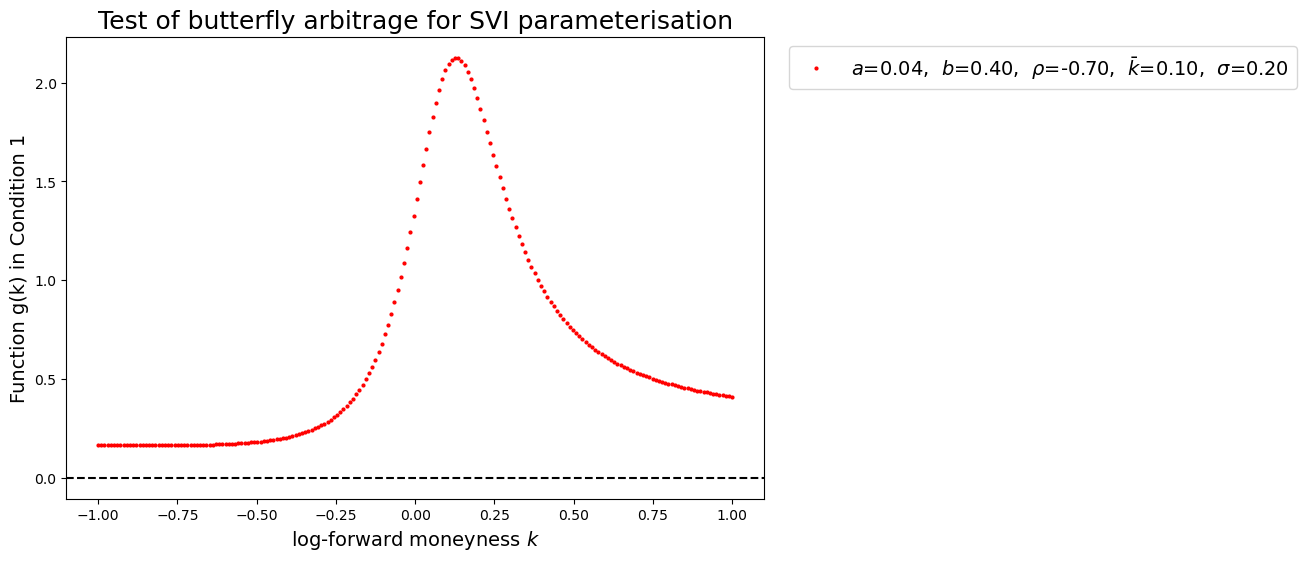

In [7]:
##############################################
# Numerical check of the no-butterfly condition
# on a grid of points
##############################################
def test_convexity(k, a, b, rho, k_bar, sig):
    square_rt = np.sqrt( (k - k_bar)*(k - k_bar) + sig*sig)
    
    w = SVI(k, a, b, rho, k_bar, sig)
    
    first_der_w = b*rho + b*(k - k_bar) / square_rt
    
    second_der_w = b*sig*sig / (square_rt**3)
    
    g = 0.5 * second_der_w + (1 - (k * first_der_w) / (2 * w) )**2 - 0.25 * (1 / w + 0.25) * (first_der_w**2)
    
    return g

##################################################
## The following function
## evaluates and plot the function g_SVI(k)
## on a fixed grid of values for k
##################################################
def numerical_test_convexity(a, b, rho, k_bar, sig, log_mon_lower=-1, log_mon_upper=1):
    log_moneyness_test = np.linspace(log_mon_lower, log_mon_upper, 200)

    test_fct_g = np.array([test_convexity(k, a, b, rho, k_bar, sig) for k in log_moneyness_test])

    plt.figure(figsize=(9,6))

    plt.plot( log_moneyness_test, test_fct_g , color="red", linewidth=0., marker=".", markersize=4, \
             label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $\bar{k}$=%1.2f,  $\sigma$=%1.2f" %(a,b,rho,k_bar,sig))

    plt.axhline(0., linestyle="--", color="k")

    plt.xlabel("log-forward moneyness $k$", fontsize=14)
    plt.ylabel("Function g(k) in Condition 1", fontsize=14)
    plt.title(r"Test of butterfly arbitrage for SVI parameterisation", fontsize=18)

    plt.legend(loc=9, fontsize=14, bbox_to_anchor=(1.4, 1.0), ncol=1)

    plt.show()
    
    assert( (test_fct_g >= 0).all )
    
    pass
    
numerical_test_convexity(a, b, rho, k_bar, sig)

## Evaluation of the No-Butterfly Condition for SVI Parameterization

Upon examining the plot generated from the numerical test of convexity across a range of log-forward moneyness values, we observe that the function $g_{\mathrm{SVI}}(k)$ remains non-negative for all evaluated points.

The plot illustrates that for each point in the log-forward moneyness spectrum, the value of $g_{\mathrm{SVI}}(k)$ stays above or on the zero line, confirming the theoretical expectation. This positive outcome supports the validity of the SVI model parameters used in this analysis, indicating a well-behaved volatility surface that adheres to fundamental arbitrage-free principles.

Given this visual and analytical confirmation, we can infer that the chosen SVI parameterization maintains the integrity of the financial model by avoiding scenarios that could lead to arbitrage opportunities, thus upholding the condition:

$$
g_{\mathrm{SVI}}(k) \geq 0, \quad \forall k \in \mathbb{R}
$$

$\blacktriangleright$ Now consider the following parameter set:

In [8]:
a = -0.041
b = 0.12
rho = 0.3586
k_bar = 0.3060
sig = 0.4153

and re-run the tests above.

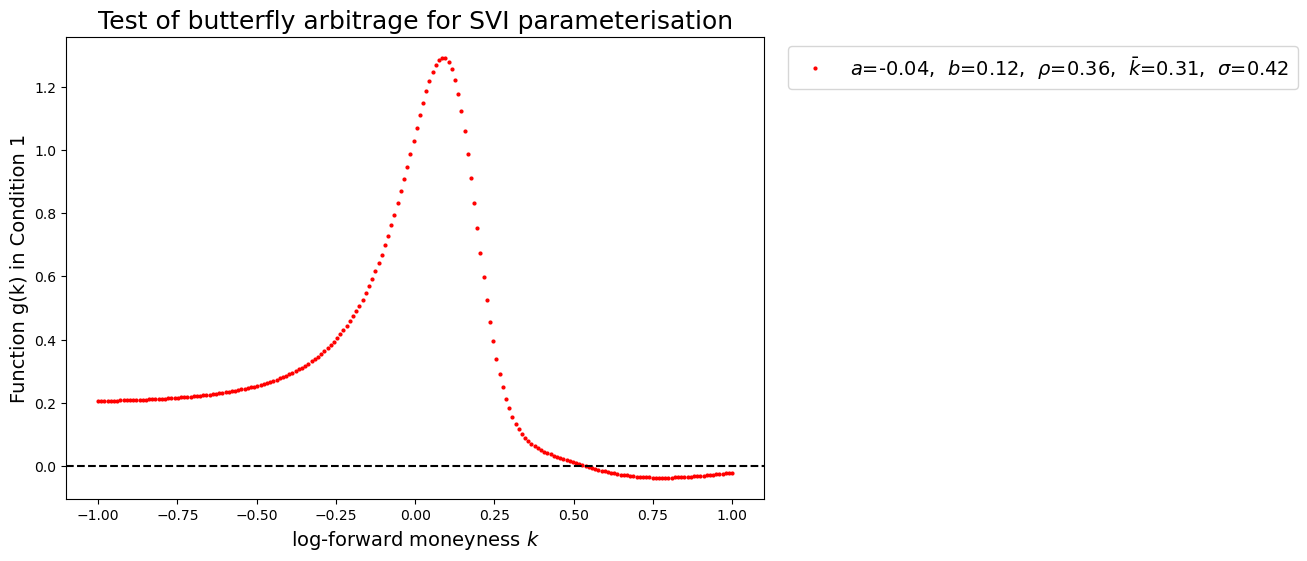

In [9]:
numerical_test_convexity(a, b, rho, k_bar, sig)

Upon conducting a numerical test for the butterfly arbitrage condition using the SVI parameter set:

- $a = -0.041$
- $b = 0.12$
- $\rho = 0.3586$
- $\bar{k} = 0.3060$
- $\sigma = 0.4153$

we encountered an assertion error, indicating a violation of the no-butterfly condition. This condition, critical for the absence of static arbitrage, requires that $g_{\mathrm{SVI}}(k) \geq 0$ for all values of $k$ across the log-forward moneyness spectrum.

### Observations from the Plot

The plot generated during the test visually revealed that $g_{\mathrm{SVI}}(k)$ drops below zero for certain ranges of $k$, highlighting areas where the SVI parameterization fails to satisfy the no-butterfly condition. Such violations suggest the presence of potential arbitrage opportunities within the model, undermining its practical application for pricing and risk management in financial markets.

### Implications

The violation of the butterfly arbitrage condition implies that the current set of SVI parameters does not produce an arbitrage-free implied volatility surface. This outcome underscores the necessity of parameter adjustment or refinement to ensure the model's integrity and its adherence to fundamental financial principles.

### Back to our numerical test with option data on the SPX

Let us go back to our option data set for the SPX, date = Jan 29 2024, expiration date = Feb 16 2024.

We reload once again the values of the log-moneyness $k = \log \frac K {F}$ and the implied volatilities we have saved in the csv file *SPX_vol_quotes.csv*.
We also import the optimal SVI parameters we have calibrated in the previous notebook.

In [10]:
quotes = np.loadtxt(open("SPX_vol_quotes.csv", "r"), delimiter=";")

print("quotes.shape : ", quotes.shape)

mkt_log_mon = quotes[0]
vols_calls = quotes[1]

maturity = 18/365


#######################################################################################
## The SVI parameters already calibrated (Notebook 8) via least-square minimimization
#######################################################################################
a_star, b_star, rho_star, k_bar_star, sig_star = 1.0109e-09, 0.02589, -0.9691, -0.0736, 0.0644

quotes.shape :  (2, 174)


$\blacktriangleright$ We plot again the resulting market smile and SVI smile:

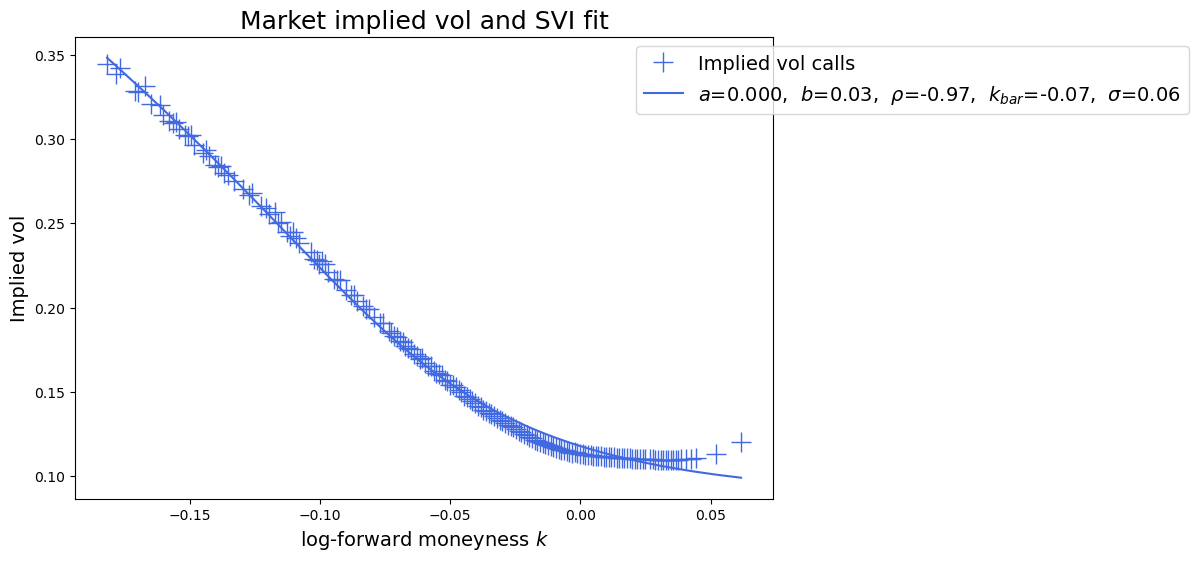

In [11]:
plt.figure(figsize=(9,6))

###########
# Market
###########
plt.plot(mkt_log_mon, vols_calls,
         color='royalblue', linewidth=0., marker="+", markersize=14, label="Implied vol calls")

##########
# Model
##########
total_variances_fit = SVI(mkt_log_mon, a_star, b_star, rho_star, k_bar_star, sig_star)

implied_vols_fit = np.sqrt(total_variances_fit / maturity)

plt.plot(mkt_log_mon, implied_vols_fit,
         color='royalblue', linewidth=1.5, 
         label=r"$a$=%1.3f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a_star, b_star, rho_star, k_bar_star, sig_star))

plt.xlabel(r"log-forward moneyness $k$", fontsize=14)
plt.ylabel("Implied vol", fontsize=14)
plt.title("Market implied vol and SVI fit", fontsize=18)

plt.legend(loc=9, fontsize=14, bbox_to_anchor=(1.2, 1.0), ncol=1)

#### $\blacktriangleright$ TO DO: check a posteriori the no-Butterfly arbitrage conditions on the calibrated SVI

### Test positivity

In [35]:
test_positivity(a_star, b_star, rho_star, sig_star)


 Positivity test: OK 



0

### Test the no-butterfly arbitrage condition (slope + convexity)

To ensure an arbitrage-free implied volatility surface for the Stochastic Volatility Inspired (SVI) model, we examine two critical aspects:


1. **Convexity Condition**: The first test checks the convexity of the SVI model across the range of $k$. This is verified by ensuring that $g_{\mathrm{SVI}}(k) \geq 0$ for all $k$, where $g_{\mathrm{SVI}}(k)$ is defined as:

    - $g_{\mathrm{SVI}}(k) = \frac{1}{2} w''_{\mathrm{SVI}}(k) + \left(1-\frac{k \cdot w'_{\mathrm{SVI}}(k)}{2 \cdot w_{\mathrm{SVI}}(k)}\right)^2 -\frac{(w'_{\mathrm{SVI}}(k))^2}{4}\left(\frac{1}{w_{\mathrm{SVI}}(k)}+\frac{1}{4}\right) \geq 0$

2. **Limit Condition**: The second test involves computing the limit of the SVI model's implied volatility as log-moneyness $k$ approaches infinity and inferring that the SVI parameterization satisfies a no-arbitrage condition based on this limit. Specifically, we evaluate:

    - Compute $\lim_{k \to \infty} \frac{w_{\mathrm{SVI}}(k)}{k}$ and infer that the SVI parameterization $w_{\mathrm{SVI}}$ satisfies the no-arbitrage condition as soon as $b (1 + \rho) < 2$.

    This condition ensures that the implied volatility does not grow faster than linearly with $k$ at infinity, preventing arbitrage opportunities from steeply sloped volatility smiles at far out-of-the-money strikes.



1. **Convexity Condition**

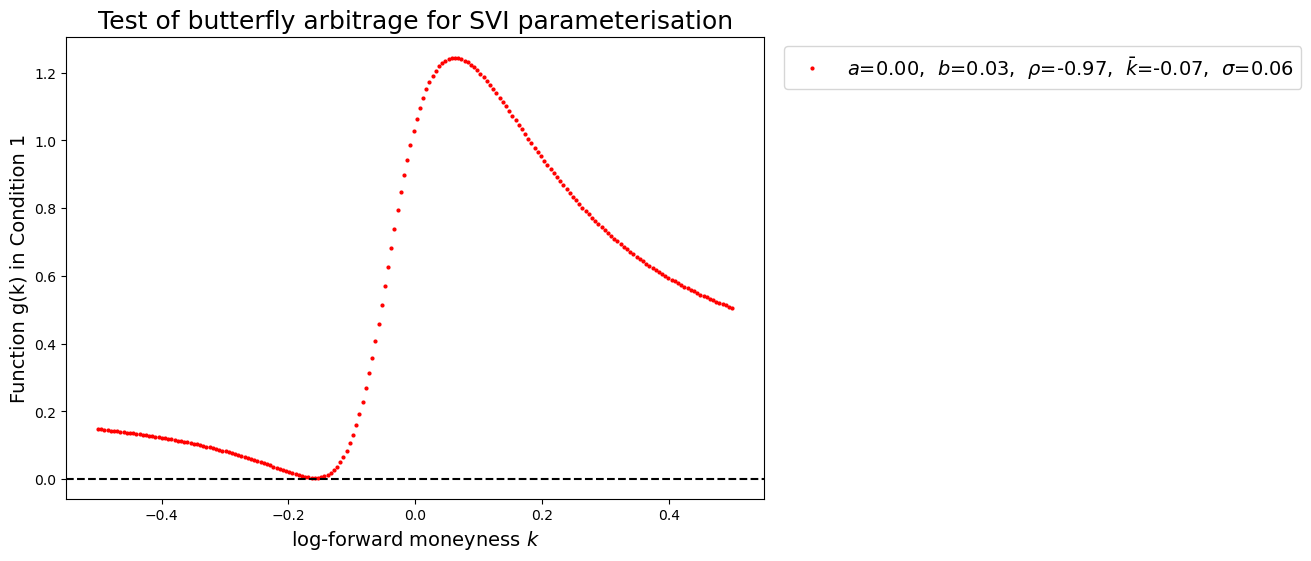

In [39]:
numerical_test_convexity(a_star, b_star, rho_star, k_bar_star, sig_star, log_mon_lower=-0.5, log_mon_upper=0.5)

In [40]:
k_range = np.linspace(-1, 1, 500)

g_SVI_values = np.array([test_convexity(k, a_star, b_star, rho_star, k_bar_star, sig_star) for k in k_range])

convexity_check = np.all(g_SVI_values >= 0)

print("Convexity check for the SVI fit: ", convexity_check)

print("Minimum value of g_SVI(k) : ", g_SVI_values.min())

Convexity check for the SVI fit:  True
Minimum value of g_SVI(k) :  0.00440824647468184


2. **Limit/Slope Condition**

In [41]:
print(f"First no-butterfly arbitrage condition met: {b_star * (1 + rho_star) < 2} \n")

First no-butterfly arbitrage condition met: True 



### Conclusion on No-Butterfly Arbitrage Conditions for SVI Parameterization

After conducting a thorough evaluation of the no-butterfly arbitrage conditions on the calibrated Stochastic Volatility Inspired (SVI) parameters, we have found that both conditions are met.

### Implications

The satisfaction of both conditions implies that the calibrated SVI model parameters produce an implied volatility surface that is consistent with arbitrage-free market principles. This finding is essential for the model's application in financial modeling, option pricing strategies, and risk management, where ensuring an arbitrage-free environment is paramount.

#### $\blacktriangleright$ According to our numerical check, the no arbitrage condition is satisfied for the calibrated SVI slice above...

..but, as we have seen in one of the numerical examples, this might fail to be the case even for parameter sets that produce a reasonably-looking implied volatility smile.

A __possible (even if not perfect) solution__ to avoid such situations is to calibrate a SVI parameterisation while _penalizing_ the parameters that violate the no arbitrage condition:

$$
\min_{(a, \, b, \, \rho, \, \bar k, \, \sigma)}
\biggl(
\sum_{i} \left( w^{\mathrm{mkt}}(k_i) - w_\mathrm{SVI} \left(k_i \, ; a,b,\rho,\bar k,\sigma \right) \right)^2
+ \lambda \sum_{k \in \pi} \Bigl(   g_\mathrm{SVI} \left(k \, ; a,b,\rho,\bar k,\sigma \right)^-  \Bigr)^2
\biggr)
$$

where:

+ $k_i$ are the observed market log-moneyness values
+ $\pi$ is some pre-defined grid of log-moneyness values (possibly larger that the set $\{k_i\}_i$)
+ $x^-$ denotes the negative part. 

In the problem above, $\lambda > 0$ is a penalization parameter to be chosen by the user.
Of course, the choice of $\lambda$ affects the final result. On the one hand, one would like to take $\lambda$ large, so that the violation of the no-arbitrage condition is strongly penalised.
On the other, we would like to take $\lambda$ small, so that the minimization problem above is close to the original one (the least square calibration of an unconstrained SVI). 

$\blacktriangleright$  We present below an alternative solution that allows to formulate the no-arbitrage constraints in terms of simple and explicitly checkable conditions in the parameter space: __another parameterisation, called SSVI__ (which stands for "Surface SVI").
The price to pay for this advantage is a weaker fitting power (SSVI has 3 available parameters instead of 5).

## Another parametric model that avoids arbitrage and that parametrizes the whole surface: the SSVI ("surface SVI") parametric family

So far, we have worked with one single maturity $T$.

How to extend the parametric model to several maturities, that is to the whole volatility surface ?

A solution is provided by the SSVI parameterisation of [Gatheral and Jacquier, 2014](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2033323), constructed as follows: first define the

### SSVI slice

$$
w_\mathrm{SSVI}(k) = \frac{\theta} 2 \Bigl(1 + \varphi \, \rho k + \sqrt{(\varphi \, k + \rho)^2 + 1 - \rho^2} \Bigr),
\qquad k \in \mathbb R
$$

where 

$$
\theta \ge 0, \qquad \varphi \ge 0, \qquad \rho \in (-1,1).
$$

Note that $w_\mathrm{SSVI}(k) \big|_{k=0} = \theta$, so that the parameter $\theta$ corresponds to the at-the-money (ATM) total variance, that is the value of the implied total variance for strike $K = F_0^T$.

It is possible to see that the SSVI slice $w_\mathrm{SSVI}$ is a special case of the original SVI $w_\mathrm{SVI}$, parameterised by __three parameters instead of five__: the mapping "SSVI to SVI" is given by 

$$
w_\mathrm{SSVI}(k; \theta, \varphi, \rho) = w_\mathrm{SVI}(k; a,b, \rho, \bar k, \sigma)
$$
where
$$
a = \frac \theta 2 (1-\rho^2), \quad
b = \frac{\theta \varphi} 2, \quad
\bar k = -\frac \rho \varphi, \quad
\sigma = \frac{\sqrt{1 - \rho^2}}\varphi.
$$

#### $\blacktriangleright$ The first advantage of the SSVI slice with respect to SVI (at fixed maturity T):

+ Thanks to the reduced complexity (3 parameters instead of 5), the no-butterfly arbitrage conditions 1) and 3) on a SSVI slice can be replaced with much simpler conditions on the parameters $(\theta, \varphi, \rho)$, given in [Gatheral and Jacquier, 2014](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2033323), Theorem 4.2, which states that the no-arbitrage conditions 1) and 3) are satisfied if

$$
\left\{
\begin{aligned}
&\theta \, \varphi \, (1+|\rho|) < 4
\\
&\theta \, \varphi^2 \, (1+|\rho|) \le 4.
\end{aligned}
\right.
$$

#### $\blacktriangleright$ The disadvantages

+ Of course, 3 parameters have a reduced calibration power with respect to 5.


+ The two inequalities above are *sufficient* conditions for the absence of butterfly arbitrage, but they are not necessary conditions (in other words: they parameterize a sub-set of the whole admissible set of admissible values of  $(\theta, \varphi, \rho)$).

$\blacktriangleright$ __TO DO__: Try a calibration of the SSVI slice (as opposed to SVI) to the market data above.

In [28]:
from scipy.optimize import minimize

In [29]:
mkt_log_mon = quotes[0]
vols_calls = quotes[1]
maturity = 18/365

In [45]:
def ssvi_slice(k, theta, phi, rho):
    """
    Computes the SSVI implied total variance for a given log-moneyness.

    Parameters:
    - k (float or np.array): Log-moneyness, defined as log(K/F), where K is the strike price and F is the forward price.
    - theta (float): Parameter representing the at-the-money (ATM) total variance of the option for a given maturity.
    - phi (float): Parameter controlling the skewness and curvature of the volatility smile.
    - rho (float): Correlation parameter between the underlying asset returns and volatility, controlling the skew of the smile.

    Returns:
    - float or np.array: The implied total variance according to the SSVI parameterization for the given log-moneyness.
    """
    return (theta / 2) * (1 + phi * rho * k + np.sqrt((phi * k + rho)**2 + 1 - rho**2))


def objective(params, k, tot_implied_variance):
    """
    Objective function for the SSVI calibration process. Calculates the sum of squared errors (SSE) 
    between the market implied volatilities and the volatilities predicted by the SSVI model 
    given a set of parameters. Includes safeguards against invalid parameter values.

    Parameters:
    - params (list or np.array): An array containing the SSVI parameters to be optimized:
        - theta (float): Represents the at-the-money (ATM) total variance for a given maturity.
        - phi (float): Controls the skewness and curvature of the volatility smile.
        - rho (float): Correlation parameter, controlling the skew of the smile.
    - k (np.array): An array of log-moneyness values. Log-moneyness is defined as log(K/F),
      where K is the strike price and F is the forward price of the underlying asset.
    - market_vols (np.array): An array of observed market implied volatilities corresponding
      to each log-moneyness value in `k`.
    - maturity (float): The maturity of the options in years.

    Returns:
    - error (float): The sum of squared errors between the market implied volatilities and the 
      volatilities predicted by the SSVI model. Returns a large penalty value if the 
      parameters are out of their valid range or if the computation results in NaN.
      
    Notes:
    - The function incorporates safeguards to return a high penalty value if the parameters
      are outside their valid range (e.g., negative theta or phi, or abs(rho) >= 1) or if the
      computed error is NaN. This helps guide the optimization process away from invalid
      parameter regions.
    """
    theta, phi, rho = params
    
    if theta <= 0 or phi < 0 or abs(rho) >= 1:
        return 1e6
    
    error = np.sum((tot_implied_variance - ssvi_slice(k, theta, phi, rho))**2)
    
    if np.isnan(error):
        return 1e6
    
    return error
    

In [46]:
constraints = (
    {'type': 'ineq', 'fun': lambda x: 4 - x[0] * x[1] * (1 + abs(x[2]))},
    {'type': 'ineq', 'fun': lambda x: 4 - x[0] * x[1]**2 * (1 + abs(x[2]))}
)

initial_guess = [0.1, 0.1, -0.5]

mkt_tot_variance = maturity * vols_calls**2

Optimization

In [47]:
result = minimize(objective, initial_guess, args=(mkt_log_mon, mkt_tot_variance),
                  method='COBYLA', constraints=constraints)

if result.success:
    calibrated_theta, calibrated_phi, calibrated_rho = result.x
    print(f"Calibrated parameters: theta={calibrated_theta}, phi={calibrated_phi}, rho={calibrated_rho}")
else:
    print("Calibration failed:", result.message)

Calibrated parameters: theta=0.001884724594639977, phi=0.6274910932426183, rho=0.6151888344851225


### Full SSVI surface

At this stage, we have only worked with fixed-maturity slices of the implied volatility surface. We haven't defined a function $w_\mathrm{SSVI}$ of $(T, k)$ yet.

Now, given:

+ a curve $T \mapsto \theta_T \ge 0$ (representing at-the-money total implied variance for each maturity $T$)


+ a function $\varphi: \mathbb R_+ \to \mathbb R_+$,

the full __Surface SVI__ model is defined by

$$
\begin{aligned}
w_\mathrm{SSVI}(T, k) 
&= 
w_\mathrm{SSVI}(k; \ \theta_{T}, \ \varphi(\theta_T), \ \rho) 
\\
&= \frac{\theta_{T}} 2 \Bigl(1 + \varphi(\theta_{T}) \rho k + \sqrt{\bigl(\varphi(\theta_{T}\bigr) k + \rho)^2 + 1 - \rho^2} \Bigr),
\qquad k \in \mathbb R, T > 0.
\end{aligned}
$$

#### $\blacktriangleright$ The second result on SSVI:

The __no-calendar spread arbitrage condition__ from the lectures:

2) The function $T \mapsto w_\mathrm{SSVI}(T, k) $ is increasing, for every $k \in \mathbb R$,

can also be reformulated as a simple condition on the functions $\theta_\cdot$ and $\varphi(\cdot)$, see [Gatheral and Jacquier, 2014](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2033323), Theorem 4.1:

$$
\left\{
\begin{aligned}
& T \mapsto \theta_T \text{ is increasing,} \\
& 0 \le \frac{\partial}{\partial \theta} (\theta \varphi(\theta)) \le \frac{1}{\rho^2} \left(1+ \sqrt{1-\rho^2}\right) \varphi(\theta) \quad \forall \theta,
\end{aligned}
\right.
$$

where, in the second line, we have supposed that the functions $\theta_\cdot$ and $\varphi(\cdot)$ are differentiable.

[Gatheral and Jacquier 2014] provide parametric examples of functions $T \mapsto \theta_T$ and $\theta \mapsto \varphi(\theta)$ that satisfy the no-calendar spread arbitrage condition above.